In [80]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import digamma, loggamma

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib notebook

In [81]:
def neg_log_shared_prim(c, nx, ny, n):
    return loggamma(c+1) + loggamma(nx - c + 1) + loggamma(ny - c + 1) +loggamma(n - nx -ny + c + 1)

def calcMLE(N):
    rez = np.full((N+1, N+1), np.nan)
    for nX in range(N+1):
        for nY in range(nX, N+1):
            cMax = np.min([nX, nY])
            cMin = np.max([0, nX + nY - N])

            c = np.arange(cMin, cMax+1)
            arr = neg_log_shared_prim(c, nX, nY, N)
            idxMin = np.argmin(arr)
            rez[nX, nY] = c[idxMin]
            rez[nY, nX] = rez[nX, nY]
    return rez

<IPython.core.display.Javascript object>


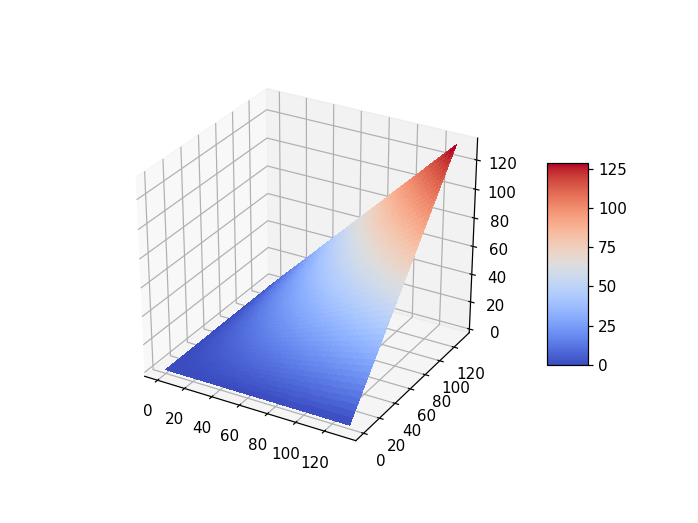

In [82]:
N = 132

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
nXLst = np.arange(N+1)
nYLst = np.arange(N+1)
X, Y = np.meshgrid(nXLst, nYLst)
mle = calcMLE(N)

# Plot the surface.
surf = ax.plot_surface(X, Y, mle, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [16]:
class poly2d:
    def __init__(self, dim):
        self.dim = dim
        
    def _eval_monad(self, x, y):
        monad = []
        xx = [x**i for i in range(self.dim + 1)]
        yy = [y**j for j in range(self.dim + 1)]
        for i in range(self.dim + 1):
            for j in range(self.dim + 1 - i):
                monad += [xx[i] * yy[j]]
        return np.array(monad)
    
    def _prefix_to_string(self, x, comma=2):
        rez = str(x)
        if x >= 0:
            rez = "+" + rez
        return rez
    
    def _power_to_string(self, var, p):
        if p == 0:
            return ""
        elif p == 1:
            return var
        else:
            return var + "^" + str(p)
    
    def value(self, x, y):
        monad = self._eval_monad(x,y)
        if monad.ndim == 1:
            return np.dot(self.coeff, monad)
        else:
            return np.einsum('i, ijk', self.coeff, monad)
    
    def fit(self, x, y, z):
        monadArr = self._eval_monad(x, y)
        monadArr = monadArr.reshape((monadArr.shape[0], monadArr.shape[1]*monadArr.shape[2]))
        
        self.coeff, s = np.linalg.lstsq(monadArr.T, z.flatten())[:2]
        print("MSE", s / np.prod(x.shape))
        
        
    def to_string(self, comma=2, sep=" "):
        rez = []
        for i in range(self.dim + 1):
            for j in range(self.dim + 1 - i):
                rez += [
                    self._prefix_to_string(self.coeff[len(rez)], comma=comma) + "*" +
                    self._power_to_string("x", i) +
                    self._power_to_string("y", j)
                ]
                
        return sep.join(rez)
        
    def plot3D(self, x, y, z=None):
        fig = plt.figure()
        ax = fig.gca(projection='3d')

        val = self.value(x, y)
        
        if z is not None:
            val = z - val
        
        # Plot the surface.
        surf = ax.plot_surface(x, y, val, cmap=cm.coolwarm, linewidth=0, antialiased=False)

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)

        plt.show()
        

MSE [0.08176872]
=========Printing Polynomial===========
-0.41560563083055757*
+0.006204852655598884*y
+1.0003657068624952e-06*y^2
+0.006204852655599817*x
+0.007479840970008078*xy
+1.0003657068607605e-06*x^2
=========Done==========================


/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


<IPython.core.display.Javascript object>


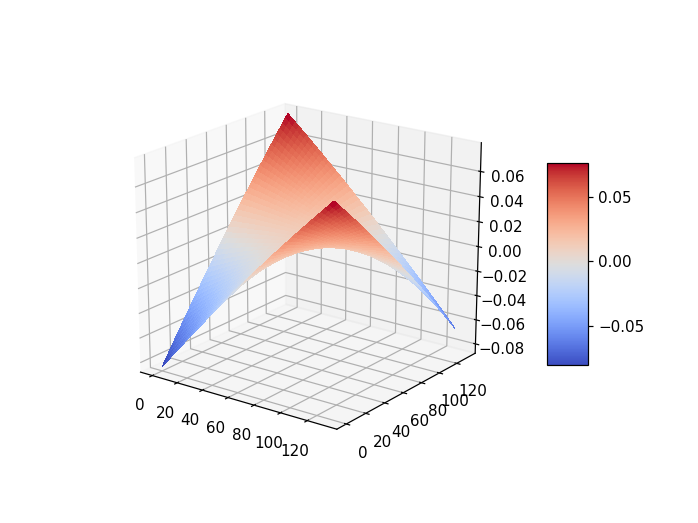

In [91]:
P = poly2d(2)
P.fit(X, Y, mle)

print("=========Printing Polynomial===========")
print(P.to_string(comma = 10, sep="\n"))
print("=========Done==========================")

#P.plot3D(X, Y, mle)
P.plot3D(X, Y,  -0.5 + (0.985*X * Y + X + Y)/N)

In [25]:
NLst = (10**np.linspace(2, 3.4, 20)).astype(int)
print(NLst)
coeffs = []
for N in NLst:
    nXLst = np.arange(N+1)
    nYLst = np.arange(N+1)
    X, Y = np.meshgrid(nXLst, nYLst)
    mle = calcMLE(N)
    P = poly2d(2)
    P.fit(X, Y, mle)
    coeffs += [P.coeff]
    

[ 100  118  140  166  197  233  276  327  388  460  545  646  765  907
 1075 1274 1509 1789 2119 2511]
MSE [0.08187358]


/opt/anaconda3/envs/py36nest/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


MSE [0.08259331]
MSE [0.08189417]
MSE [0.0828052]
MSE [0.08214945]
MSE [0.08254876]
MSE [0.08267936]
MSE [0.08270599]
MSE [0.08314155]
MSE [0.08316765]
MSE [0.08297409]
MSE [0.0832517]
MSE [0.08309022]
MSE [0.08316768]
MSE [0.08318715]
MSE [0.08325769]
MSE [0.08320483]
MSE [0.08325707]
MSE [0.08327781]
MSE [0.08326959]


<IPython.core.display.Javascript object>


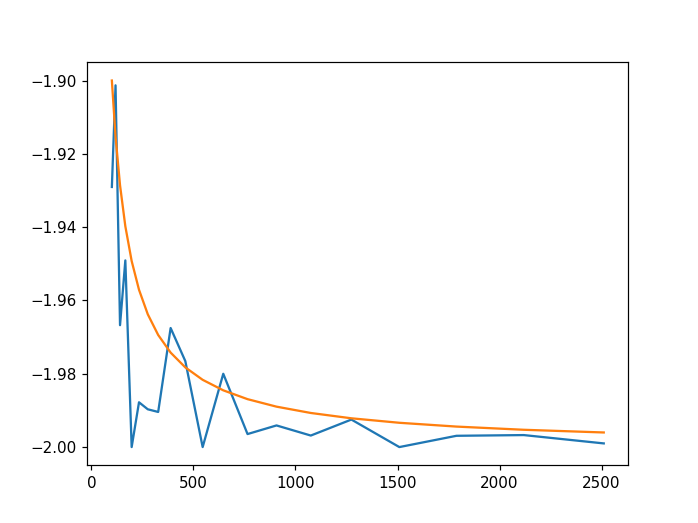

In [74]:
coeffs = np.array(coeffs)
plt.figure()
plt.plot(NLst, coeffs[:, 1] * np.array(NLst) / coeffs[:, 0] )
plt.plot(NLst, (-2 + 10/np.array(NLst)))
plt.show()

In [38]:
P.to_string()

'-0.49249290470536095* +0.0003920724487709471*y +6.807746906348569e-11*y^2 +0.0003920724487710849*x +0.0003979353006845936*xy +6.807746906348569e-11*x^2'

In [46]:
-coeffs[:, 1] / coeffs[:, 0] * np.array(NLst)

array([1.92904092, 1.90130994, 1.96674492, 1.94907484, 2.        ,
       1.98778199, 1.98969213, 1.99042113, 1.9675173 , 1.97654852,
       2.        , 1.98000274, 1.9964513 , 1.99409671, 1.99685648,
       1.99249409, 2.        , 1.99692328, 1.99672755, 1.99900122])

<IPython.core.display.Javascript object>


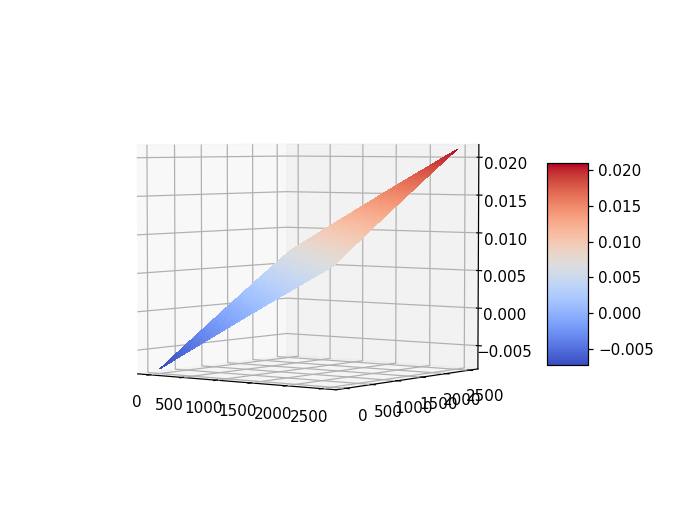

In [78]:
P.plot3D(X, Y, -0.5 + 0.0003979353006845936 * (X * Y + X + Y))

In [79]:
0.0003979353006845936 * NLst[-1]

0.9992155400190145